### Task 1 Multiple Regression

1. Use meap93 from wooldridge. Regress math10 on enroll, totcomp, and staff

In [1]:
import wooldridge as woo
import statsmodels.formula.api as smf

df = woo.data("meap93")
reg = smf.ols("math10~enroll+totcomp+staff",data=df)
res = reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 math10   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     7.697
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           5.18e-05
Time:                        20:37:58   Log-Likelihood:                -1526.2
No. Observations:                 408   AIC:                             3060.
Df Residuals:                     404   BIC:                             3076.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2740      6.114      0.372      0.710      -9.745      14.293
enroll        -0.0002      0.000     -0.918      0.359      -0.001       0.000
totcomp        0.0005      0.000      4.570      0.000       0.000       0.001
staff          0.0479      0.040      1.204      0.229      -0.030       0.126
==============================================================================
Omnibus:                       31.666   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.628
Skew:                           0.615   Prob(JB):                     1.51e-09
Kurtosis:                       3.936   Cond. No.                     4.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. Regress math10 on all the other variables in the data

In [2]:
ls = []
# for v in df.columns:
#     if v not in ["math10","enroll","totcomp","staff"]:
#         ls.append(v)

ls = [v for v in df.columns if v not in ["math10","enroll","totcomp","staff"]]
exog_v = "+".join(ls)
reg2 = smf.ols("math10~"+exog_v,data=df)
res2 = reg.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 math10   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     7.697
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           5.18e-05
Time:                        20:37:58   Log-Likelihood:                -1526.2
No. Observations:                 408   AIC:                             3060.
Df Residuals:                     404   BIC:                             3076.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2740      6.114      0.372      0.710      -9.745      14.293
enroll        -0.0002      0.000     -0.918      0.359      -0.001       0.000
totcomp        0.0005      0.000      4.570      0.000       0.000       0.001
staff          0.0479      0.040      1.204      0.229      -0.030       0.126
==============================================================================
Omnibus:                       31.666   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.628
Skew:                           0.615   Prob(JB):                     1.51e-09
Kurtosis:                       3.936   Cond. No.                     4.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3. Show t-values and their associated p-values

In [3]:
res.tvalues

Intercept    0.371949
enroll      -0.917935
totcomp      4.570030
staff        1.203593
dtype: float64

In [4]:
res.pvalues

Intercept    0.710126
enroll       0.359201
totcomp      0.000006
staff        0.229452
dtype: float64

4. Replicate t-values and p-values using scipy and numpy

In [5]:
import numpy as np
from scipy.stats import t

In [6]:
tv = res.params/res.bse
pv = (1-t.cdf(tv,df = res.df_resid))*2
print(tv)
print(pv)

Intercept    0.371949
enroll      -0.917935
totcomp      4.570030
staff        1.203593
dtype: float64
[7.10125657e-01 1.64079935e+00 6.48931216e-06 2.29451832e-01]


5. Create a scatter plot for y and the predicted values of y.

In [7]:
y = reg.endog
y_h = res.fittedvalues

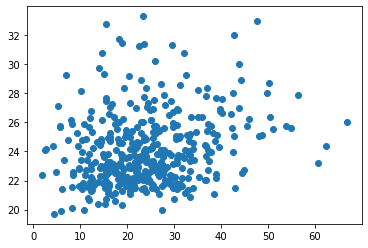

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y,y_h)
plt.show()

### Task 2 Bias-Variance Tradeoff

math10 ~ enroll

1. Think of an omitted variable (out of the dataset) and comment on the potential bias

> Private school is positively correlated with math10 and negatively correlated with enroll.

2.  Comment on the direction of the bias.

> When private school is omitted, OLS will underestimate the effect of enroll on math10.

### Task 3 Hypothesis Test

1. Use the baseline model. Test if enroll and totcomp has the same coefficient

In [9]:
res.t_test("enroll=totcomp")

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0007      0.000     -2.360      0.019      -0.001      -0.000

Since p-value is less than 0.05, we reject the null hypothesis that $\beta_{enroll} = \beta_{totcomp}$. 

2. Use f-test to test if the coefficients on staff and totcomp are both equal to zero

In [10]:
res.f_test(["staff=0","totcomp=0"])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[10.4470124]]), p=3.770072987259239e-05, df_denom=404, df_num=2>

Since p-value of the f-test is less than 0.05, we reject the null hypothesis that $\beta_{staff} = 0$ and $\beta_{totcomp}=0$. 

3. Jarque-Bera test statistic is given by $$\mathit{JB}={\frac {n}{6}}\left(S^{2}+{\frac {1}{4}}(K-3)^{2}\right)$$

where S and K are the skewness and kurtosis of $\hat{u}$. Try to compute JB-statistic using `scipy.stats.skew()` and `scipy.stats.kurtosis()`.

In [11]:
from statsmodels.stats.stattools import jarque_bera
jarque_bera(res.resid)

(40.627526412311546,
 1.5060685266868997e-09,
 0.6150384252643253,
 3.9363575367536545)

In [12]:
from scipy.stats import skew, kurtosis, chi2
# fisher = False is the kurtosis. fisher = True will yield kurtosis - 3
# bias = True is the population statistic. bias = False is the sample statistic
jb = len(df)/6*(skew(res.resid,bias=True)**2+1/4*((kurtosis(res.resid,bias=True,fisher=False)-3)**2))
jb

40.627526412311546

4. $JB\sim \chi^2(2)$, conduct the JB test. (upper-tail)

In [13]:
1- chi2.cdf(jb,df = 2)

1.5060684921408551e-09

Breusch-Pagan test is a hypothesis test for heteroscedasticity, where

$H_0: \sigma_i^2 = \sigma^2 \space for \forall i$.

BP test is equivalent to an F-test for the following regression:

$\hat{u}^2 = X\beta+u$


5. Carry out the BP test.

In [14]:
y = res.resid**2
X = reg.exog

In [15]:
import statsmodels.api as sm

In [16]:
reg_bp = sm.OLS(endog=y,exog = X)
res_bp = reg_bp.fit()

In [17]:
res_bp.fvalue

9.432190901436114

In [18]:
res_bp.f_pvalue

4.892886175372146e-06

6. Read the documentation and, use `statsmodels.stats.diagnostic.het_breuschpagan` to test if there is heteroskedasticity.

In [19]:
import statsmodels.api as sm
X = reg.exog

In [20]:
sm.stats.diagnostic.het_breuschpagan(res.resid, X)
# LM test statistic
# LM p-value
# f statistic
# f p-value

(26.706206785624026,
 6.7842318852475595e-06,
 9.432190901436114,
 4.892886175372146e-06)

p-values for LM-test and F-test are both less than 0.05, so we reject the null hypothesis that there is no heteroskedasticity. 

7. Rerun the regress with HC2 standard errors.

In [21]:
res_hc2 = reg.fit(cov_type = "HC2")

## Task 4 Regularization

1. split df into 3 folds using KFold \
In each iteration print:
- the OLS regression coefficients (using train sample)
- r2_score using validation sample

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [23]:
y = reg.endog
X = reg.exog

c=1
kf = KFold(3)
for tr, va in kf.split(df):
    reg4 = sm.OLS(endog = y[tr], exog = X[tr,:])
    res4 = reg4.fit()
    print("Iteration: ", c)
    c+=1
    print("coefficients: ", res4.params)
    print("R2: ", r2_score(y[va],res4.predict(X[va,:])))

Iteration:  1
coefficients:  [ 9.96566569e+00 -4.69671840e-04  3.01198971e-04  2.08193995e-02]
R2:  -0.28673113834549
Iteration:  2
coefficients:  [-1.03336296e+00 -3.82765413e-04  5.80120347e-04  3.95192259e-02]
R2:  -0.03724718145846828
Iteration:  3
coefficients:  [2.91470464e+00 2.68547561e-04 3.04342274e-04 1.04437598e-01]
R2:  -0.314490419539456


2. Find the best alpha among [0,1,10,100,1000]\
Use GridSearchCV, Ridge regression, cv=5, and r2 scoring metric

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [25]:
ridge = GridSearchCV(Ridge(), param_grid={"alpha":[0,1,10,100,1000]},cv=5, scoring="r2", verbose=3)
ridge.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..........................alpha=0;, score=-0.576 total time=   0.0s
[CV 2/5] END ..........................alpha=0;, score=-0.016 total time=   0.0s
[CV 3/5] END ..........................alpha=0;, score=-0.077 total time=   0.0s
[CV 4/5] END ..........................alpha=0;, score=-0.044 total time=   0.0s
[CV 5/5] END ..........................alpha=0;, score=-0.908 total time=   0.0s
[CV 1/5] END ..........................alpha=1;, score=-0.576 total time=   0.0s
[CV 2/5] END ..........................alpha=1;, score=-0.016 total time=   0.0s
[CV 3/5] END ..........................alpha=1;, score=-0.077 total time=   0.0s
[CV 4/5] END ..........................alpha=1;, score=-0.044 total time=   0.0s
[CV 5/5] END ..........................alpha=1;, score=-0.908 total time=   0.0s
[CV 1/5] END .........................alpha=10;, score=-0.576 total time=   0.0s
[CV 2/5] END .........................alpha=10;, 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 1, 10, 100, 1000]}, scoring='r2',
             verbose=3)

In [26]:
ridge.cv_results_

{'mean_fit_time': array([0.00122833, 0.00059605, 0.00047159, 0.00050182, 0.00048938]),
 'std_fit_time': array([4.67048524e-04, 1.66089439e-04, 9.70521183e-05, 5.47595939e-05,
        7.69035897e-05]),
 'mean_score_time': array([0.00021954, 0.00017185, 0.0001586 , 0.00016508, 0.00016775]),
 'std_score_time': array([4.69216971e-05, 9.68625177e-06, 9.44859778e-06, 1.27580453e-05,
        5.01609120e-06]),
 'param_alpha': masked_array(data=[0, 1, 10, 100, 1000],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100},
  {'alpha': 1000}],
 'split0_test_score': array([-0.57622908, -0.5762293 , -0.57623128, -0.576251  , -0.57644464]),
 'split1_test_score': array([-0.01581023, -0.01581034, -0.01581134, -0.01582137, -0.01591993]),
 'split2_test_score': array([-0.07736194, -0.07736156, -0.07735816, -0.0773243 , -0.07699308]),
 'split3_test_score': array([-0.04407648, -0

3. plot the validation r2 against different values of alpha.

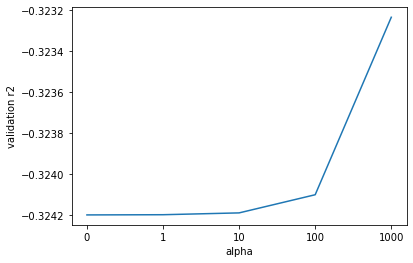

In [27]:
plt.plot(ridge.cv_results_["mean_test_score"])
plt.xticks(range(5),[0,1,10,100,1000])
plt.xlabel("alpha")
plt.ylabel("validation r2")
plt.show()